# Training Baseline with YOLO

This notebook focuses on training the YOLO model for 2D object detection using a dataset adapted from the previously created particle detection dataset. Here we get the trained YOLO model ready for inference on particle detection tasks.

## Install and Import modules

In [ ]:
!pip download -d ./packages ultralytics
!tar cfvz archive.tar.gz ./packages

  File was already downloaded /content/packages/ultralytics-8.3.67-py3-none-any.whl
  File was already downloaded /content/packages/numpy-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  File was already downloaded /content/packages/matplotlib-3.10.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  File was already downloaded /content/packages/opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  File was already downloaded /content/packages/pillow-11.1.0-cp311-cp311-manylinux_2_28_x86_64.whl
  File was already downloaded /content/packages/PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  File was already downloaded /content/packages/requests-2.32.3-py3-none-any.whl
  File was already downloaded /content/packages/scipy-1.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
  File was already downloaded /content/packages/torch-2.5.1-cp311-cp311-manylinux1_x86_64.whl
  File was already downloade

In [ ]:
#We use the path of our google drive dataset folder

from google.colab import drive
drive.mount('/content/datasets/gdrive')
dataFolder = "gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D APPROACH/1 - SOURCE DATA/"

Mounted at /content/datasets/gdrive


In [ ]:
!tar xfvz gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/3 - TRAINING CODE/LIBRARIES/archive.tar.gz
!pip install --no-index --find-links=./packages ultralytics
!rm -rf ./packages

tar (child): gdrive/My: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
Looking in links: ./packages
Processing ./packages/ultralytics-8.3.67-py3-none-any.whl
Processing ./packages/ultralytics_thop-2.0.14-py3-none-any.whl (from ultralytics)


In [ ]:
from tqdm import tqdm
import glob, os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Dataset Preparation

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.model_download("ultralytics/yolo11/pyTorch/default")

print("Path to model files:", path)


  0%|          | 0.00/109M [00:00<?, ?B/s]



  0%|          | 0.00/18.4M [00:00<?, ?B/s]




  0%|          | 0.00/49.0M [00:00<?, ?B/s]





  0%|          | 0.00/38.8M [00:00<?, ?B/s]






  0%|          | 0.00/5.35M [00:00<?, ?B/s]
  1%|          | 1.00M/109M [00:01<02:24, 788kB/s]

  5%|▌         | 1.00M/18.4M [00:01<00:23, 783kB/s]


  2%|▏         | 1.00M/49.0M [00:01<01:04, 781kB/s]



  3%|▎         | 1.00M/38.8M [00:01<00:51, 775kB/s]




 19%|█▊        | 1.00M/5.35M [00:01<00:05, 787kB/s]
  2%|▏         | 2.00M/109M [00:01<01:13, 1.53MB/s]

 11%|█         | 2.00M/18.4M [00:01<00:11, 1.53MB/s]


  4%|▍         | 2.00M/49.0M [00:01<00:32, 1.52MB/s]



  5%|▌         | 2.00M/38.8M [00:01<00:25, 1.51MB/s]




 37%|███▋      | 2.00M/5.35M [00:01<00:02, 1.53MB/s]
  3%|▎         | 3.00M/109M [00:01<00:45, 2.44MB/s]

 16%|█▋        | 3.00M/18.4M [00:01<00:06, 2.43MB/s]


  6%|▌         | 3.00M/49.0M [00:01<00:19, 2.42MB/s]



  8%|▊         | 3.00M/38.8M [00:01<00:15, 2.40MB/s]




 56%|█████▌    | 3.00M/5.35M [00:01<00:01, 2.44MB/s]
  5%|▍         | 5.00M/109M [00:01<00:24, 4.47MB/s]

 27%|██▋       | 5.00M/18.4M [00:01<00:03, 4.48MB/s]


 10%|█         | 5.00M/49.

Path to model files: /root/.cache/kagglehub/models/ultralytics/yolo11/pyTorch/default/1


In [ ]:
# Load a pretrained model
model = YOLO("/root/.cache/kagglehub/models/ultralytics/yolo11/pyTorch/default/1/yolo11l.pt")

## Model Training

In [ ]:
# Train the model
_ = model.train(
    data="/content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/czii_conf.yaml",
    epochs=30,
    warmup_epochs=10,
    optimizer='AdamW',
    cos_lr=True,
    lr0=3e-4,
    lrf=0.03,
    imgsz=640,
    device="0",
    weight_decay=0.005,
    batch=32,
    scale=0,
    flipud=0.5,
    fliplr=0.5,
    degrees=45,
    shear=5,
    mixup=0.2,
    copy_paste=0.25,
    seed=8620, # (｡•◡•｡)
)

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/root/.cache/kagglehub/models/ultralytics/yolo11/pyTorch/default/1/yolo11l.pt, data=/content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/czii_conf.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=8620, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False

100%|██████████| 755k/755k [00:00<00:00, 83.3MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 411MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/labels/train.cache... 1104 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1104/1104 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/labels/val.cache... 184 images, 30 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      21.5G      2.247      2.807      1.613        481        640: 100%|██████████| 35/35 [04:23<00:00,  7.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:10<00:00,  3.57s/it]

                   all        184       2640      0.388     0.0171        0.2     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      21.1G      1.322      1.384      1.089        423        640: 100%|██████████| 35/35 [00:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.46s/it]

                   all        184       2640      0.655      0.355       0.41       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      21.3G      1.254      1.256       1.06        359        640: 100%|██████████| 35/35 [00:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

                   all        184       2640      0.577      0.517      0.531      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      21.3G      1.236      1.236      1.049        418        640: 100%|██████████| 35/35 [00:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all        184       2640      0.569      0.528       0.54      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        21G      1.171       1.18       1.03        488        640: 100%|██████████| 35/35 [00:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all        184       2640      0.554      0.581      0.588      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      21.4G      1.195      1.182      1.032        538        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.61s/it]

                   all        184       2640      0.494      0.591      0.554      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      21.3G      1.137      1.168      1.014        417        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        184       2640      0.596      0.593      0.606      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      21.2G      1.127      1.132      1.009        332        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.571      0.616      0.608      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      21.5G      1.131       1.11       1.01        362        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.624      0.555      0.588      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      21.1G      1.123        1.1      1.007        447        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.568       0.59      0.589      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      21.2G      1.113       1.11      1.008        456        640: 100%|██████████| 35/35 [00:32<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.455      0.531      0.578      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      21.1G      1.108      1.101      1.001        460        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.602      0.587       0.61      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      21.2G      1.103      1.087          1        512        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.573        0.6      0.596      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      21.5G      1.059      1.062     0.9834        329        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.556      0.614      0.612      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      21.1G      1.061      1.044      0.984        433        640: 100%|██████████| 35/35 [00:32<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.544      0.615      0.595      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      21.3G      1.068       1.04     0.9867        554        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.648      0.588      0.633      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      21.2G      1.046      1.018     0.9798        415        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.606      0.567      0.613      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      21.2G      1.024      1.006     0.9709        447        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.26s/it]

                   all        184       2640      0.622        0.6      0.603      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      21.2G      1.029     0.9982     0.9733        351        640: 100%|██████████| 35/35 [00:32<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all        184       2640       0.67      0.609      0.613      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      21.1G      1.011     0.9707     0.9659        475        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.612      0.606      0.626      0.438


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      21.2G     0.9222     0.8804     0.9269        325        640: 100%|██████████| 35/35 [00:35<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.586      0.584       0.61      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      21.2G      0.913     0.8455     0.9265        354        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.588      0.572      0.598      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      21.2G     0.9026     0.8218     0.9233        201        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.608      0.586      0.607      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      21.1G     0.8661     0.7943     0.9144        212        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.597      0.613      0.599      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      21.1G     0.8602     0.7714     0.9094        452        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.584       0.57      0.593      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30        21G     0.8449     0.7418     0.9042        271        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.578      0.578      0.595      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      21.1G     0.8297     0.7164     0.8992        340        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.615      0.604        0.6      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30        21G     0.8193     0.7122     0.8987        284        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640        0.6      0.572      0.591      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      21.1G     0.8136     0.6987     0.8957        346        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640       0.59      0.566      0.589      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30        21G     0.8078     0.6833     0.8938        253        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.583      0.573      0.587      0.412



30 epochs completed in 0.380 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.46s/it]

In [ ]:
# We load the best checkpoint file that contains the trained weights of the YOLO model.
model = YOLO("/content/runs/detect/train/weights/best.pt")

#Specifie metrics for validation
metrics = model.val(data="/content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/czii_conf.yaml", imgsz=640, batch=16, conf=0.25, iou=0.6, device="0", save_json=True)  # no arguments needed, dataset and settings remembered

print('Average Precision (mAP) across IoU thresholds from 0.50 to 0.95 (in increments of 0.05)')
print(metrics.box.map)  # map50-95

print('Average Precision (mAP) specifically for IoU = 0.50 (a common baseline metric for object detection).')
print(metrics.box.map50)  # map50

print('Average Precision (mAP) specifically for IoU = 0.50 (a common baseline metric for object detection).')
print(metrics.box.map75)  # map75

print('mAP vALUES')
print(metrics.box.maps)

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning /content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/labels/val.cache... 184 images, 30 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.80it/s]


                   all        184       2640       0.65       0.58      0.641      0.469
          apo-ferritin        133        506      0.733      0.745      0.786      0.552
    beta-galactosidase        112        200      0.518       0.22      0.377      0.251
              ribosome        145        899      0.675      0.775      0.782      0.574
         thyroglobulin        144        749      0.466      0.192      0.286      0.201
   virus-like-particle        105        286       0.86      0.965      0.974      0.767
Speed: 0.4ms preprocess, 17.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val
Average Precision (mAP) across IoU thresholds from 0.50 to 0.95 (in increments of 0.05)
0.4690132408796314
Average Precision (mAP) specifically for IoU = 0.50 (a common baseline metric for object detection).
0.6410363880891766
Average Precision (mAP) specifically for IoU = 0.50 (a common baseline metric fo

## Prediction Examples on Validation Set


image 1/1 /content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_920.png: 640x640 2 apo-ferritins, 14 ribosomes, 5 thyroglobulins, 5 virus-like-particles, 18.0ms
Speed: 2.3ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


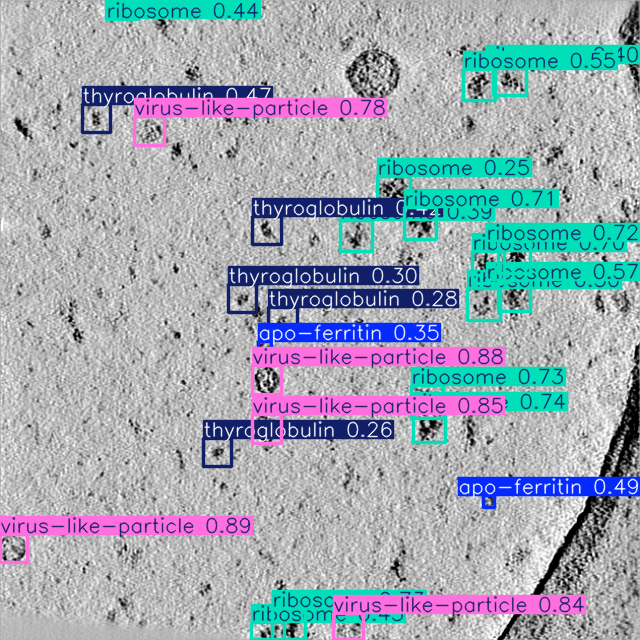

In [ ]:
results = model("/content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_920.png")
results[0].show()


image 1/1 /content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_340.png: 640x640 4 ribosomes, 1 virus-like-particle, 18.9ms
Speed: 2.5ms preprocess, 18.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


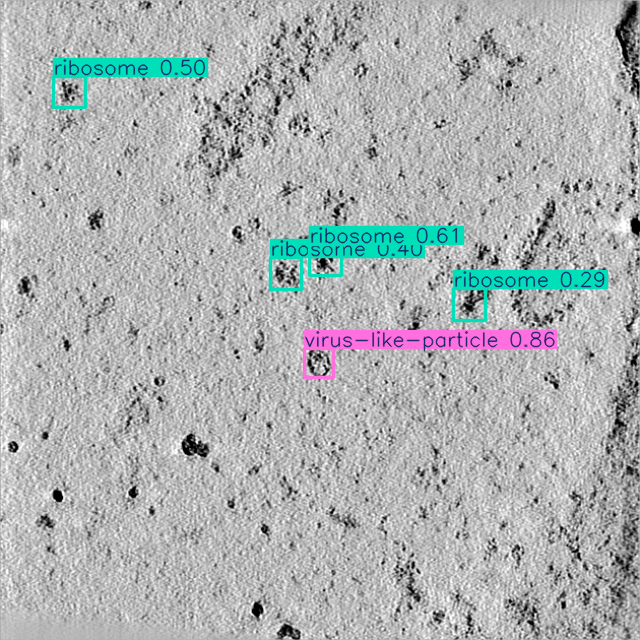

In [ ]:
results = model("/content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_340.png")
results[0].show()


image 1/1 /content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_1350.png: 640x640 4 ribosomes, 24.2ms
Speed: 2.0ms preprocess, 24.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


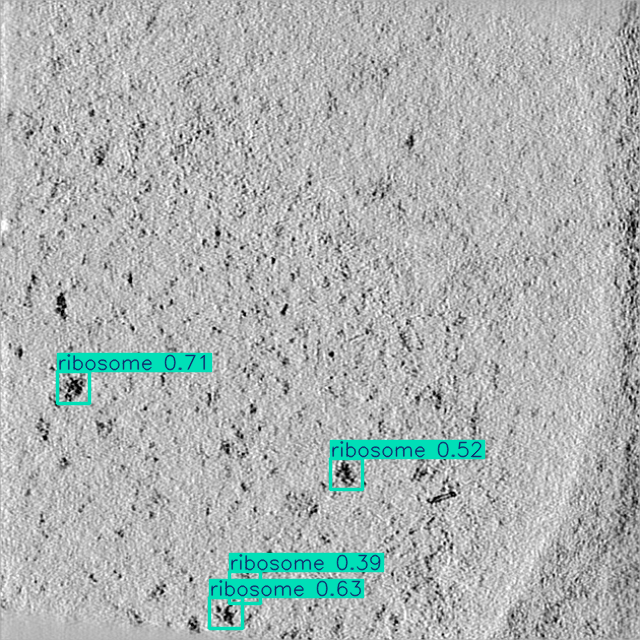

In [ ]:
results = model("/content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_1350.png")
results[0].show()


image 1/1 /content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_1440.png: 640x640 3 ribosomes, 20.4ms
Speed: 2.0ms preprocess, 20.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


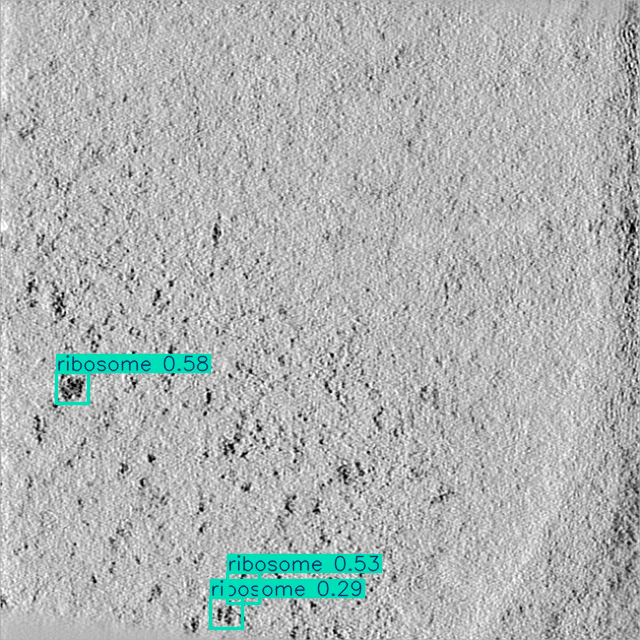

In [ ]:
results = model("/content/datasets/gdrive/My Drive/MLDM - Deep Learning/CRYOET PROJECT - DEEP LEARNING/2D U-NET APPROACH/1 - SOURCE DATA/2 - YOLO DATASET/images/val/TS_5_4_1440.png")
results[0].show()